# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
#Use transforms or other PyTorch methods to convert the data to tensors, normalize, and flatten the data.
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)),])

train_data = torchvision.datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = torchvision.datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# Create training set and define training dataloader
## YOUR CODE HERE ##
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)


# Create test set and define test dataloader
## YOUR CODE HERE ##
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

For the transform, I just converted the data into tensor and normalized the data. Using this data, I trained the model and observed that the performance of the model is good. So, this choice of transform has worked well.

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [11]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


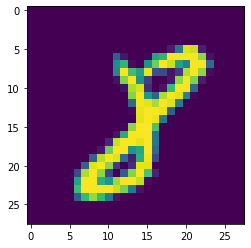

5


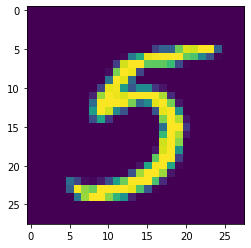

3


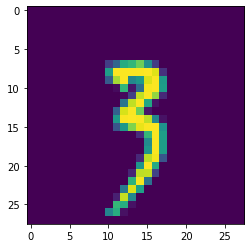

8


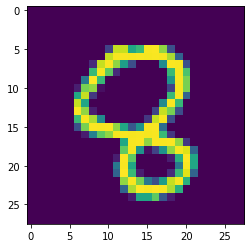

9


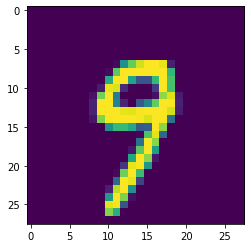

In [12]:
# Explore data
## YOUR CODE HERE ##
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [3]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.linear1 = nn.Linear(28*28, 128) 
        self.linear2 = nn.Linear(128, 80)
        self.linear3 = nn.Linear(80, 10)
        self.final = nn.LogSoftmax(dim=1)
        self.relu = nn.ReLU()

    def forward(self, img): 
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return self.final(x)

model = Net()
model.cuda()

Net(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=80, bias=True)
  (linear3): Linear(in_features=80, out_features=10, bias=True)
  (final): LogSoftmax(dim=1)
  (relu): ReLU()
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [4]:
## YOUR CODE HERE ##
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [5]:
## YOUR CODE HERE ##
epochs = 30
losses = []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.cuda(), labels.cuda()
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    losses.append(running_loss/len(train_loader))
    print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(train_loader)))

Epoch 0 - Training loss: 0.3737460634569878
Epoch 1 - Training loss: 0.2561502658835511
Epoch 2 - Training loss: 0.23960044006826972
Epoch 3 - Training loss: 0.2320404870113902
Epoch 4 - Training loss: 0.21336873829054998
Epoch 5 - Training loss: 0.21201613882997397
Epoch 6 - Training loss: 0.20179349943987532
Epoch 7 - Training loss: 0.19856945067536888
Epoch 8 - Training loss: 0.191356426508013
Epoch 9 - Training loss: 0.19282206693000947
Epoch 10 - Training loss: 0.18752778718110993
Epoch 11 - Training loss: 0.175009174634075
Epoch 12 - Training loss: 0.17875721789638338
Epoch 13 - Training loss: 0.1840341596392297
Epoch 14 - Training loss: 0.16396271174640528
Epoch 15 - Training loss: 0.1779628311971953
Epoch 16 - Training loss: 0.16643880626786428
Epoch 17 - Training loss: 0.16508927834289733
Epoch 18 - Training loss: 0.16960528623690008
Epoch 19 - Training loss: 0.16218235613956952
Epoch 20 - Training loss: 0.14981879068162243
Epoch 21 - Training loss: 0.15762759640856064
Epoch 2

Plot the training loss (and validation loss/accuracy, if recorded).

Text(0.5, 1.0, 'Loss Per Epoch')

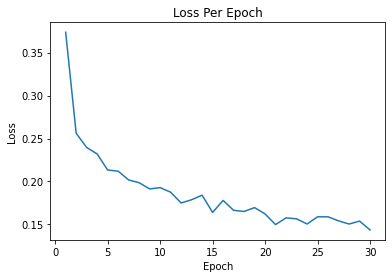

In [6]:
## YOUR CODE HERE ##
plt.plot(range(1, epochs + 1), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Per Epoch')

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [8]:
## YOUR CODE HERE ##
correct, total = 0, 0

for images , labels in test_loader:
    
    images, labels = images.cuda(), labels.cuda()
    
    for i in range(len(labels)):
        
        img = images[i].view(1, 784)
        
        with torch.no_grad():
            logit = model(img)
        
        pred = logit.data.max(1, keepdim=True)[1]
        actual = labels[i]
        
        if int(actual) == int(pred[0][0]):
            correct += 1
        
        total +=1

print("Accuracy {}".format(correct/total))

Accuracy 0.9516


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [9]:
## YOUR CODE HERE ##
## YOUR CODE HERE ##
class Net1(nn.Module):
    def __init__(self):
        super(Net1,self).__init__()
        self.linear1 = nn.Linear(28*28, 128) 
        self.linear2 = nn.Linear(128, 64)
        self.linear3 = nn.Linear(64, 10)
        self.final = nn.LogSoftmax(dim=1)
        self.relu = nn.ReLU()
        

    def forward(self, img): 
        x = img.view(-1, 28*28)
        x = self.relu(self.linear1(x))
        #x = self.drop(x)
        x = self.relu(self.linear2(x))
        x = self.linear3(x)
        return self.final(x)

model1 = Net1()
model1.cuda()

## YOUR CODE HERE ##
criterion = nn.NLLLoss()
optimizer = torch.optim.Adam(model1.parameters(), lr=0.01)

## YOUR CODE HERE ##
epochs = 30
losses = []

for epoch in range(epochs):
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.cuda(), labels.cuda()
        images = images.view(images.shape[0], -1)
        
        optimizer.zero_grad()
        output = model1(images)
        loss = criterion(output, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    losses.append(running_loss/len(train_loader))
    print("Epoch {} - Training loss: {}".format(epoch, running_loss/len(train_loader)))

    
## YOUR CODE HERE ##
correct, total = 0, 0

for images , labels in test_loader:
    
    images, labels = images.cuda(), labels.cuda()
    
    for i in range(len(labels)):
        
        img = images[i].view(1, 784)
        
        with torch.no_grad():
            logit = model1(img)
        
        pred = logit.data.max(1, keepdim=True)[1]
        actual = labels[i]
        
        if int(actual) == int(pred[0][0]):
            correct += 1
        
        total +=1

print("Accuracy {}".format(correct/total))

Epoch 0 - Training loss: 0.39547767662512723
Epoch 1 - Training loss: 0.2455229266508937
Epoch 2 - Training loss: 0.22463823193664362
Epoch 3 - Training loss: 0.2211627464519063
Epoch 4 - Training loss: 0.2084653359561809
Epoch 5 - Training loss: 0.20328243323830145
Epoch 6 - Training loss: 0.19609114520355012
Epoch 7 - Training loss: 0.1973655081283587
Epoch 8 - Training loss: 0.19091049440181268
Epoch 9 - Training loss: 0.18970864453513833
Epoch 10 - Training loss: 0.18689045656535988
Epoch 11 - Training loss: 0.17809941073599608
Epoch 12 - Training loss: 0.17654785469595366
Epoch 13 - Training loss: 0.17633549608032045
Epoch 14 - Training loss: 0.17823670810457867
Epoch 15 - Training loss: 0.17163709041152173
Epoch 16 - Training loss: 0.162221314212772
Epoch 17 - Training loss: 0.16995303151158017
Epoch 18 - Training loss: 0.17334674113317888
Epoch 19 - Training loss: 0.16619215970700071
Epoch 20 - Training loss: 0.16223104764421437
Epoch 21 - Training loss: 0.16827108913924355
Epoc

## Saving your model
Using `torch.save`, save your model for future loading.

In [10]:
## YOUR CODE HERE ##
torch.save(model1.state_dict(), './model1.pth')